# Exercise 5: Classification Tree

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Problem 1: Predicting CentralAir using SalePrice

### Import the Dataset

In [3]:
hseData = pd.read_csv('train.csv')
hseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Response Variable : **CentralAir**     
Predictor Feature : **SalePrice**    

Extract the variables and the associated data as a Pandas `DataFrame`.

In [4]:
CentralAir = pd.DataFrame(hseData['CentralAir'])  # Response
SalePrice = pd.DataFrame(hseData['SalePrice'])  # Predictor

### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.

### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. 


Split the Train and Test sets randomly.

The total set contains 1460 entries.     
Using the 80:20 ratio for Train and Test:   
Train Set with 1168 samples and Test Set with 292 samples.

In [5]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the CentralAir-SalePrice Dataset into Train and Test, with random_state = 1, to have consistent results
SalePrice_train, SalePrice_test, CentralAir_train, CentralAir_test = train_test_split(SalePrice, CentralAir, random_state = 1, test_size = 0.2)

#### Check the count of CentralAir

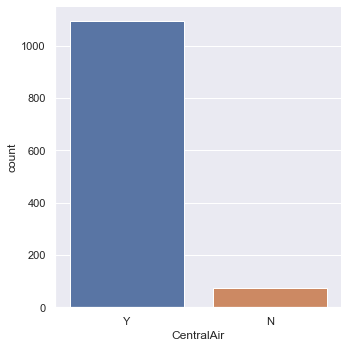

In [6]:
# Count Plot for CentralAir Train
sb.catplot(x = "CentralAir", data = CentralAir_train, kind = "count")

### Classification Tree with Random Train-Test Split (with Max Depth = 2)

Split the Train and Test sets randomly, and perform Classification.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94264
True Positive Rate 		: 0.99909
False Positive Rate 		: 0.89189

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.93493
True Positive Rate 		: 1.0
False Positive Rate 		: 0.90476



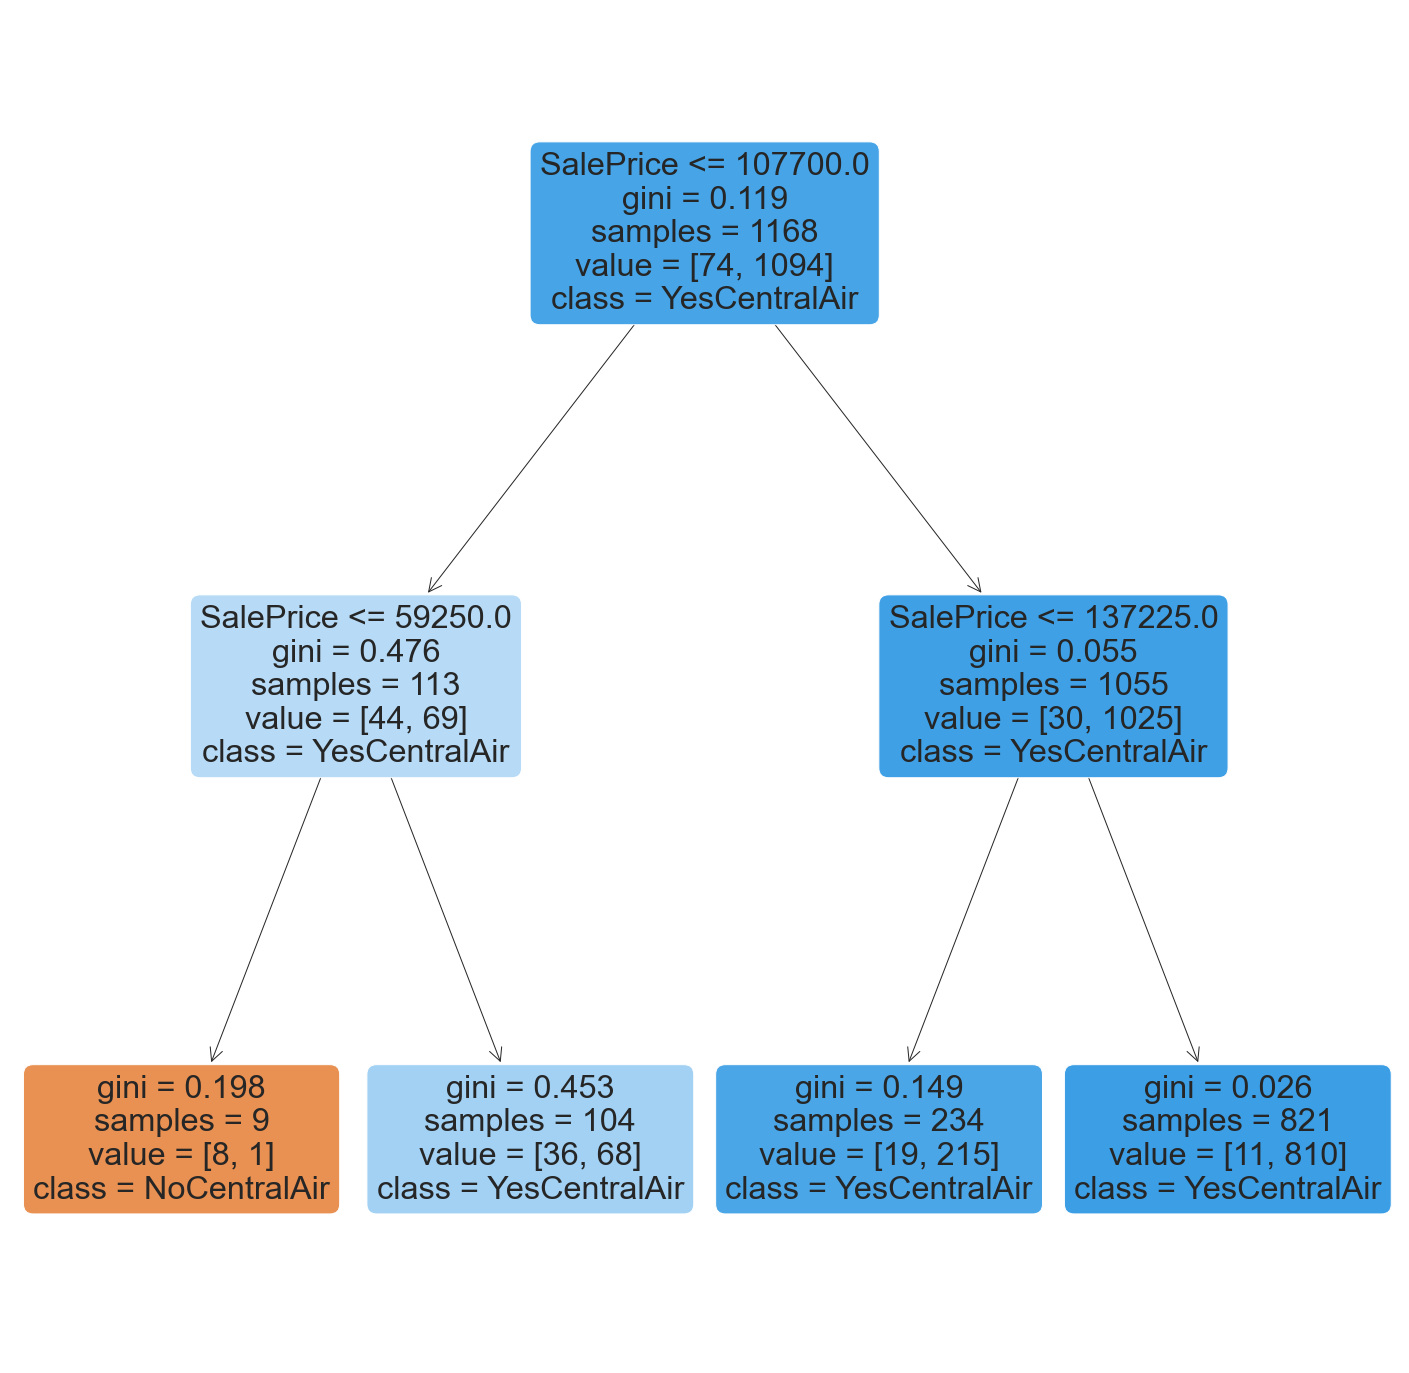

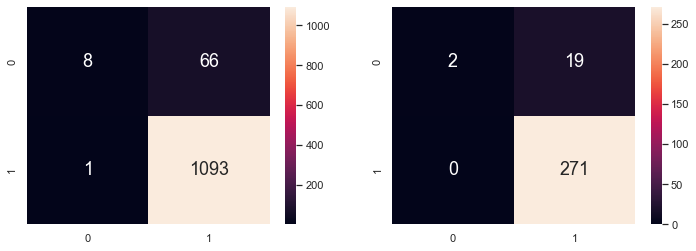

In [7]:
# Decision Tree using Train Data
dectree2 = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree2.fit(SalePrice_train, CentralAir_train)   # train the decision tree model

# Predict Legendary values corresponding to Total
CentralAir_train_pred = dectree2.predict(SalePrice_train)
CentralAir_test_pred = dectree2.predict(SalePrice_test)

# Plot the trained Decision Tree of max depth 2, with YesCentralAir and NoCentralAir representing Yes and No respectively
from sklearn.tree import plot_tree

f = plt.figure(figsize=(25,25))
plot_tree(dectree2, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["NoCentralAir","YesCentralAir"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

confM_train = confusion_matrix(CentralAir_train, CentralAir_train_pred)
sb.heatmap(confM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

confM_test = confusion_matrix(CentralAir_test, CentralAir_test_pred)
sb.heatmap(confM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(SalePrice_train, CentralAir_train).round(5))

# Get the metrics for the different parameters in confusion matrix (for Train Data)
FP = confM_train.sum(axis=0) - np.diag(confM_train) # False Positive
FN = confM_train.sum(axis=1) - np.diag(confM_train) # False Negative
TP = np.diag(confM_train)                           # True Positive
TN = confM_train.sum() - (FP + FN + TP)             # True Negative

# Calculate the True Positive Rate (for Train Data)
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate (for Train Data)
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(SalePrice_test, CentralAir_test).round(5))

# Get the metrics for the different parameters in confusion matrix (for Test Data)
FP = confM_test.sum(axis=0) - np.diag(confM_test)
FN = confM_test.sum(axis=1) - np.diag(confM_test)
TP = np.diag(confM_test)
TN = confM_test.sum() - (FP + FN + TP)

# Calculate the True Positive Rate (for Test Data)
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate (for Test Data)
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

---
### Classification Tree with Random Train-Test Split (with Max Depth = 4)

The same split train-test set for max depth = 2 is also utilised in this, to perform Classification.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94606
True Positive Rate 		: 0.99726
False Positive Rate 		: 0.81081

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.92808
True Positive Rate 		: 0.99262
False Positive Rate 		: 0.90476



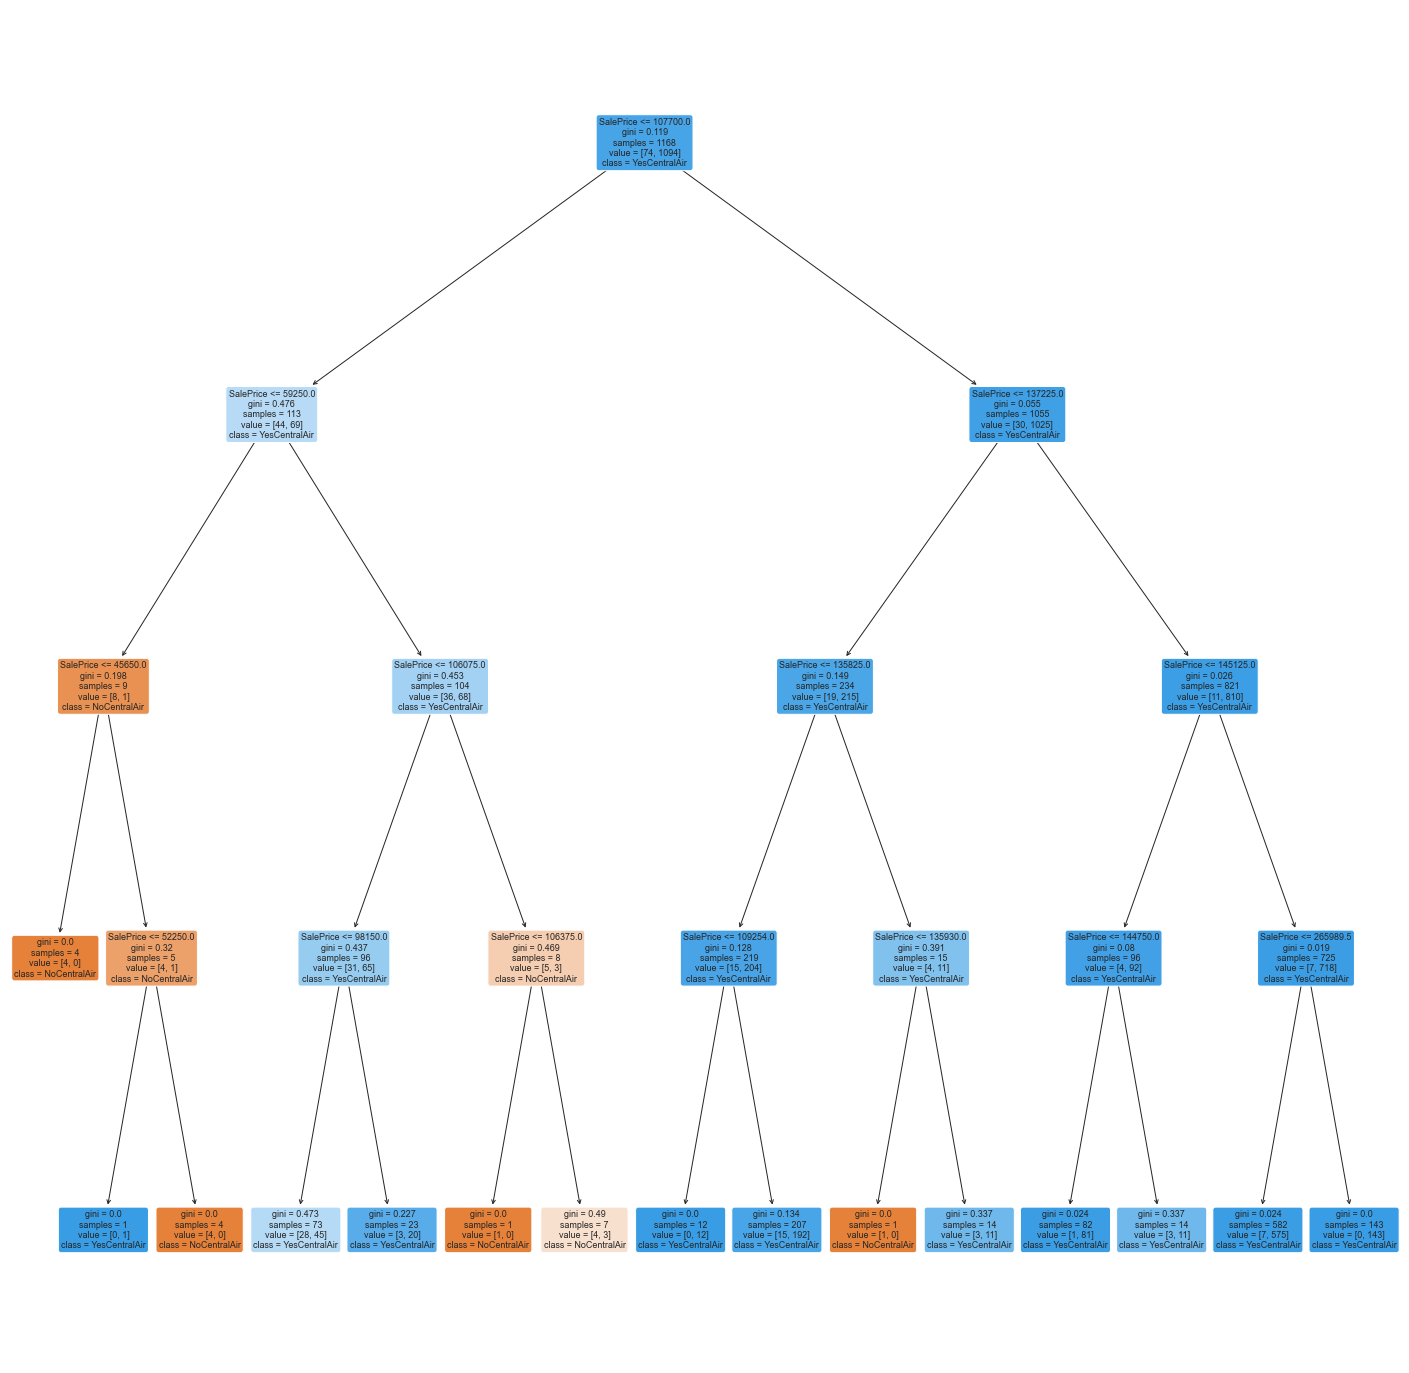

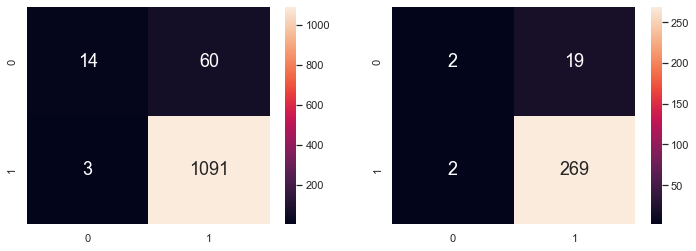

In [8]:
# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree4.fit(SalePrice_train, CentralAir_train)   # train the decision tree model

# Predict CentralAir values corresponding to SalePrice
CentralAir_train_pred = dectree4.predict(SalePrice_train)
CentralAir_test_pred = dectree4.predict(SalePrice_test)

# Plot the trained Decision Tree of max depth 4
f = plt.figure(figsize=(25,25))
plot_tree(dectree4, filled=True, rounded=True, feature_names=["SalePrice"], class_names=["NoCentralAir","YesCentralAir"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))

confM_train = confusion_matrix(CentralAir_train, CentralAir_train_pred)
sb.heatmap(confM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

confM_test = confusion_matrix(CentralAir_test, CentralAir_test_pred)
sb.heatmap(confM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(SalePrice_train, CentralAir_train).round(5))

# Get the metrics for the different parameters in confusion matrix (for Train Data)
FP = confM_train.sum(axis=0) - np.diag(confM_train) # False Positive
FN = confM_train.sum(axis=1) - np.diag(confM_train) # False Negative
TP = np.diag(confM_train)                           # True Positive
TN = confM_train.sum() - (FP + FN + TP)             # True Negative

# Calculate the True Positive Rate (for Train Data)
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate (for Train Data)
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(SalePrice_test, CentralAir_test).round(5))

# Get the metrics for the different parameters in confusion matrix (for Test Data)
FP = confM_test.sum(axis=0) - np.diag(confM_test)  
FN = confM_test.sum(axis=1) - np.diag(confM_test)
TP = np.diag(confM_test)
TN = confM_test.sum() - (FP + FN + TP)

# Calculate the True Positive Rate (for Test Data)
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate (for Test Data)
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

---
### Which model is better?

>The model with the max depth = 4 is the better model. This can be compared from the true positive values of both models, as the model with depth 4 shows a better representation of the true positive rate value (TPR) where the train set is more and the test set is lesser but close. The false positive rate (FPR) is also slightly lower in the max depth of 4 which shows that the likelihood of selecting a false positive sample is lower. The max depth = 4 thus ensures that we do not underfit the model and thus allows for a better accuracy in
---

## Problem 2: Predicting CentralAir using Other Variables

### Using OverallQual

Response Variable : **CentralAir**     
Predictor Feature : **OverallQual**    

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.93921
True Positive Rate 		: 1.0
False Positive Rate 		: 0.95946

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.93493
True Positive Rate 		: 1.0
False Positive Rate 		: 0.90476



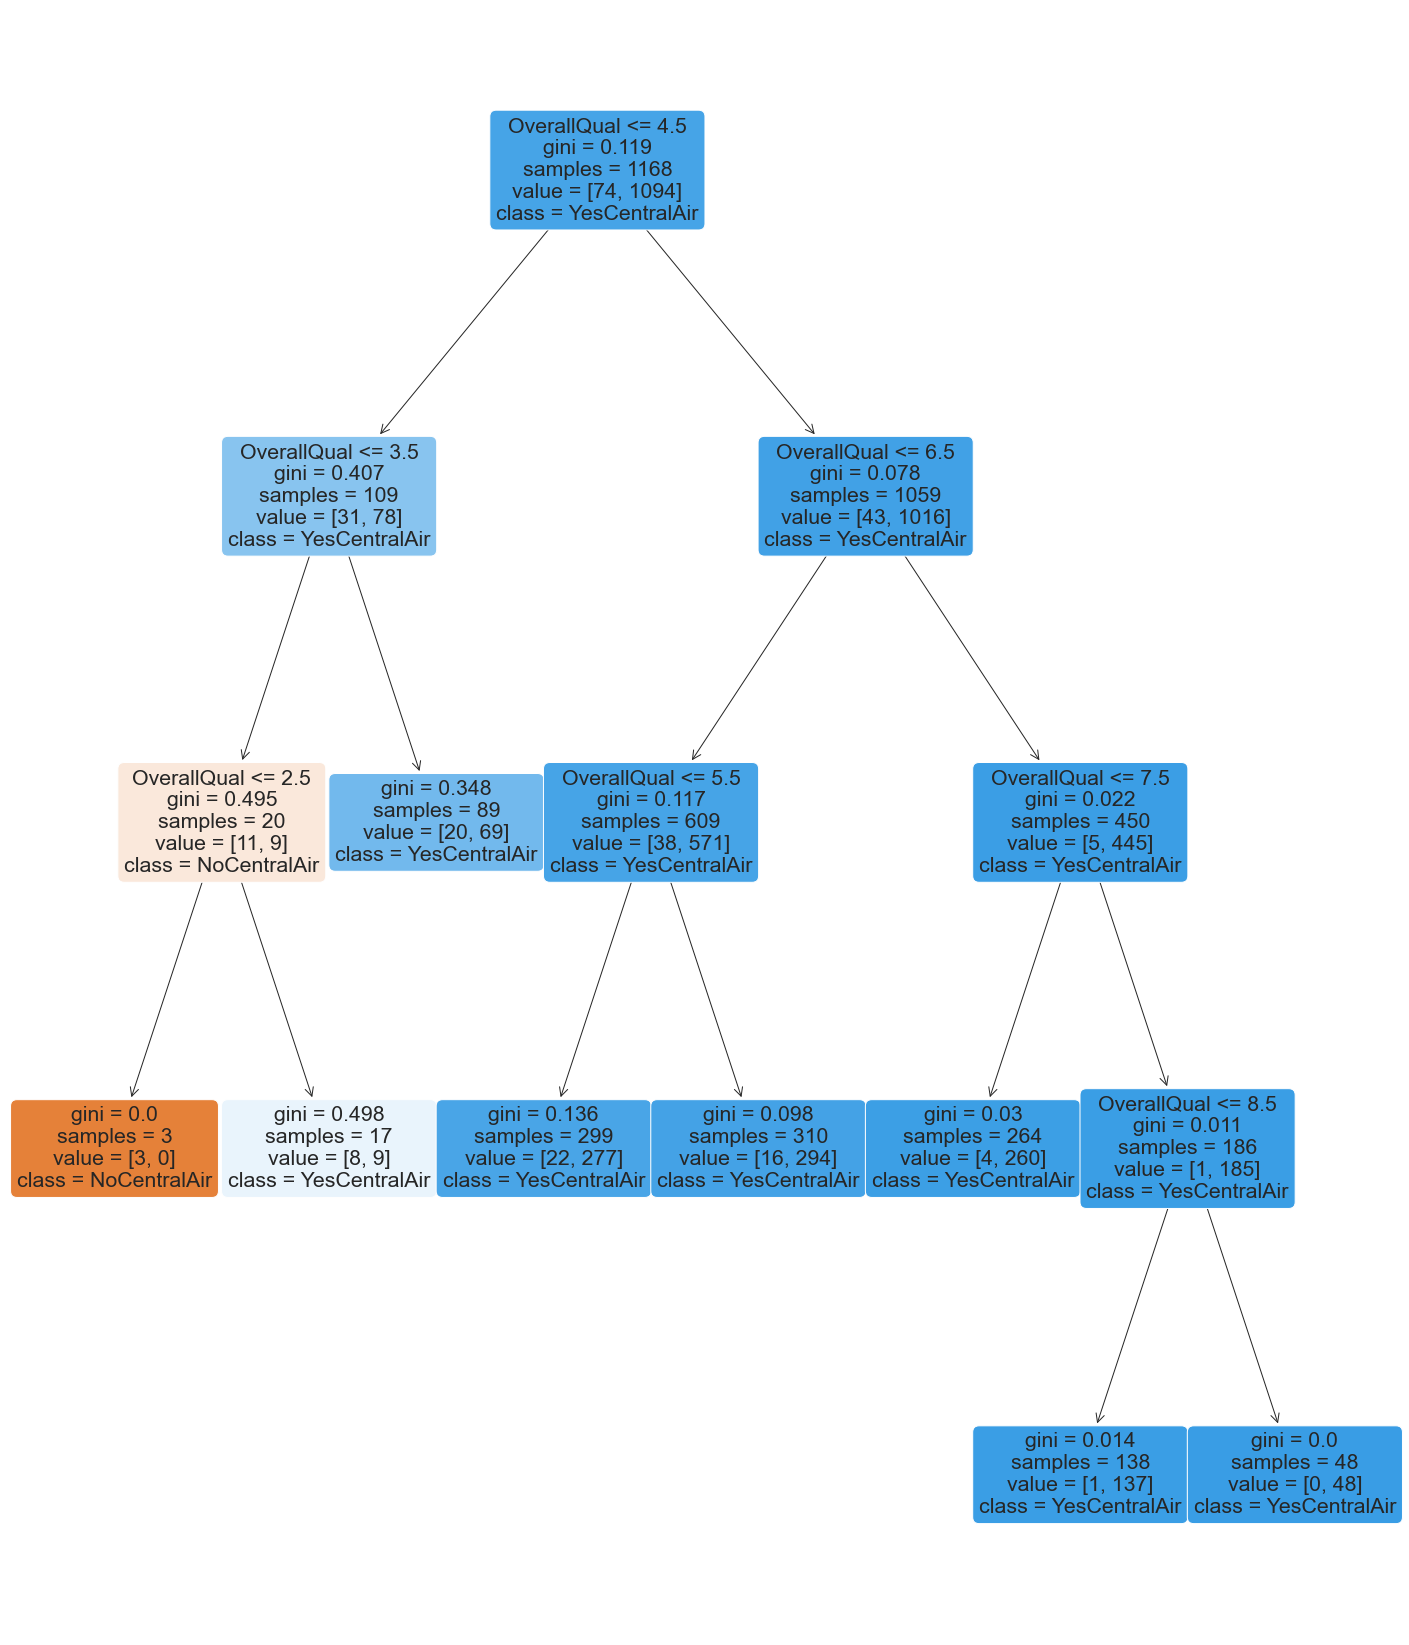

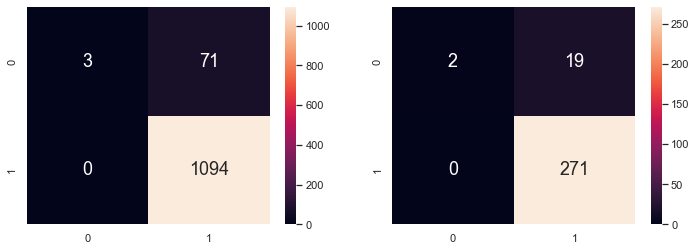

In [9]:
OverallQual = pd.DataFrame(hseData['OverallQual'])  # Predictor

# Split the CentralAir-OverallQual Dataset into Train and Test, with random_state = 1, to have consistent results
OverallQual_train, OverallQual_test, CentralAir_train, CentralAir_test = train_test_split(OverallQual, CentralAir, random_state = 1, test_size = 0.2)

# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree4.fit(OverallQual_train, CentralAir_train) # train the decision tree model

# Predict CentralAir values corresponding to OverallQual
CentralAir_train_pred = dectree4.predict(OverallQual_train)
CentralAir_test_pred = dectree4.predict(OverallQual_test)

# Plot the trained Decision Tree of max depth 4
f = plt.figure(figsize=(25,30))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["NoCentralAir","YesCentralAir"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
confM_train = confusion_matrix(CentralAir_train, CentralAir_train_pred)
sb.heatmap(confM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
confM_test = confusion_matrix(CentralAir_test, CentralAir_test_pred)
sb.heatmap(confM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(OverallQual_train, CentralAir_train).round(5))

FP = confM_train.sum(axis=0) - np.diag(confM_train)  
FN = confM_train.sum(axis=1) - np.diag(confM_train)
TP = np.diag(confM_train)
TN = confM_train.sum() - (FP + FN + TP)

# Calculate the True Positive Rate
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(OverallQual_test, CentralAir_test).round(5))

FP = confM_test.sum(axis=0) - np.diag(confM_test)  
FN = confM_test.sum(axis=1) - np.diag(confM_test)
TP = np.diag(confM_test)
TN = confM_test.sum() - (FP + FN + TP)

# Calculate the True Positive Rate
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

---
### Using YearBuilt

Response Variable : **CentralAir**     
Predictor Feature : **YearBuilt**   

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94606
True Positive Rate 		: 0.9872
False Positive Rate 		: 0.66216

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.89726
True Positive Rate 		: 0.95941
False Positive Rate 		: 0.90476



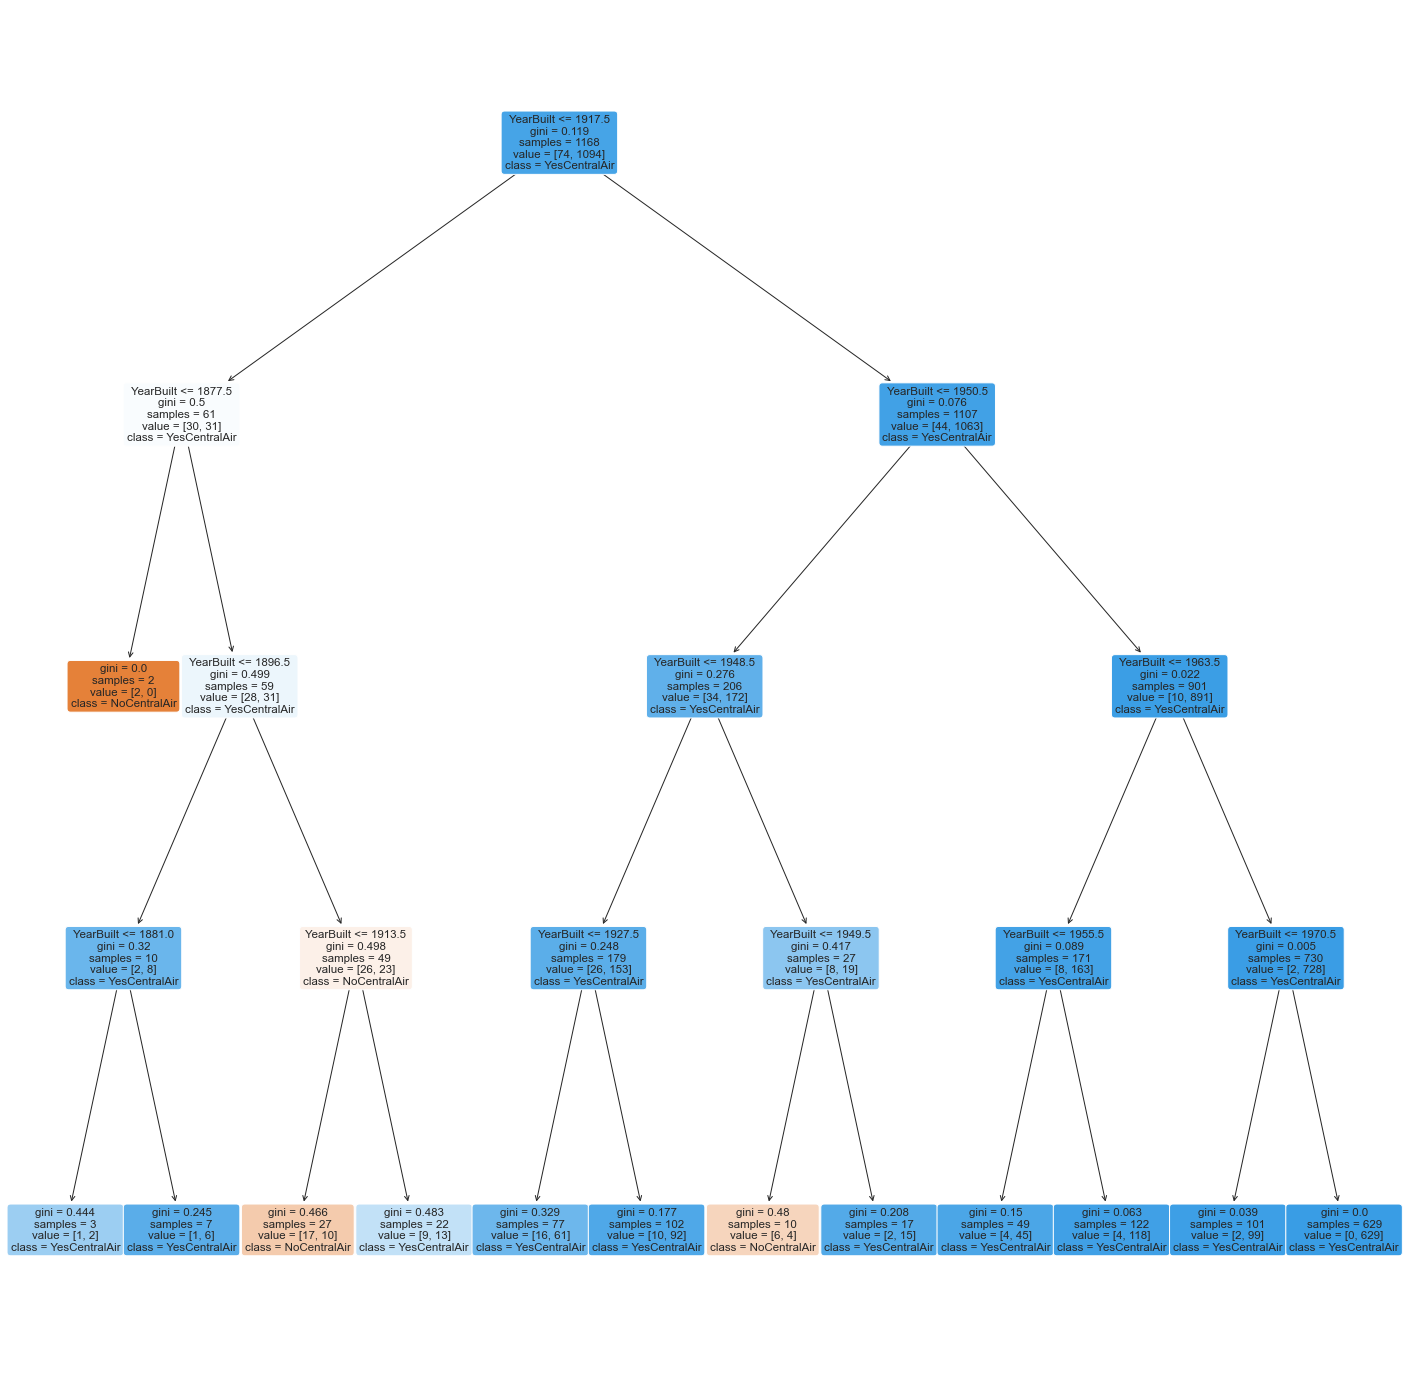

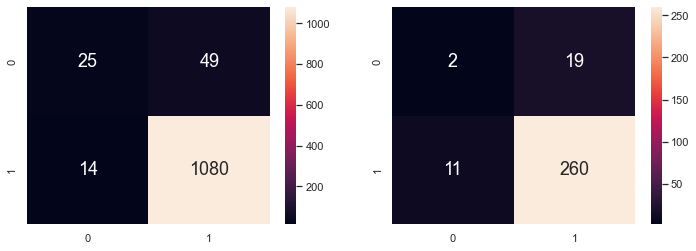

In [10]:
YearBuilt = pd.DataFrame(hseData['YearBuilt'])  # Predictor

# Split the CentralAir-YearBuilt Dataset into Train and Test, with random_state = 1, to have consistent results
YearBuilt_train, YearBuilt_test, CentralAir_train, CentralAir_test = train_test_split(YearBuilt, CentralAir, random_state = 1, test_size = 0.2)

# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree4.fit(YearBuilt_train, CentralAir_train)   # train the decision tree model

# Predict CentralAir values corresponding to YearBuilt
CentralAir_train_pred = dectree4.predict(YearBuilt_train)
CentralAir_test_pred = dectree4.predict(YearBuilt_test)

# Plot the trained Decision Tree of max depth 4
f = plt.figure(figsize=(25,25))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["NoCentralAir","YesCentralAir"])

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
confM_train = confusion_matrix(CentralAir_train, CentralAir_train_pred)
sb.heatmap(confM_train, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
confM_test = confusion_matrix(CentralAir_test, CentralAir_test_pred)
sb.heatmap(confM_test, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(YearBuilt_train, CentralAir_train).round(5))

FP = confM_train.sum(axis=0) - np.diag(confM_train)  
FN = confM_train.sum(axis=1) - np.diag(confM_train)
TP = np.diag(confM_train)
TN = confM_train.sum() - (FP + FN + TP)

# Calculate the True Positive Rate
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(YearBuilt_test, CentralAir_test).round(5))

FP = confM_test.sum(axis=0) - np.diag(confM_test)  
FN = confM_test.sum(axis=1) - np.diag(confM_test)
TP = np.diag(confM_test)
TN = confM_test.sum() - (FP + FN + TP)

# Calculate the True Positive Rate
TPR = TP/(TP+FN)
print("True Positive Rate \t\t:", TPR[1].round(5))

# Calculate the False Positive Rate
FPR = FP/(FP+TN)
print("False Positive Rate \t\t:", FPR[1].round(5))
print()

---
### Justify which of the variables is the best predictor.

>The overallQual seems to be the best predictor as its true positive rate (TPR) for both its train and test are equivalent. Its TPR is higher than the rest and its False positive rate (FPR) dropped for its test set when compared to the others which actually increased, signifying that it is able to produce lower false positive cases. Its classification accuracy for both its train and test set is also similar, showing that it will  be able to classify the samples similarly in both its train and test set.
---

## Problem 3: Understanding the Misclassified Samples

[Text(892.3189655172413, 1223.1, 'SalePrice <= 107700.0\ngini = 0.119\nsamples = 1168\nvalue = [74, 1094]\nclass = YesCentralAir'),
 Text(370.3965517241379, 951.3, 'SalePrice <= 59250.0\ngini = 0.476\nsamples = 113\nvalue = [44, 69]\nclass = YesCentralAir'),
 Text(134.68965517241378, 679.5, 'SalePrice <= 45650.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = NoCentralAir'),
 Text(67.34482758620689, 407.69999999999993, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = NoCentralAir'),
 Text(202.03448275862067, 407.69999999999993, 'SalePrice <= 52250.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = NoCentralAir'),
 Text(134.68965517241378, 135.89999999999986, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = YesCentralAir'),
 Text(269.37931034482756, 135.89999999999986, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = NoCentralAir'),
 Text(606.103448275862, 679.5, 'SalePrice <= 106075.0\ngini = 0.453\nsamples = 104\nvalue = [36, 68]\nclass = YesCentralAir'),
 Text(471.4137931034

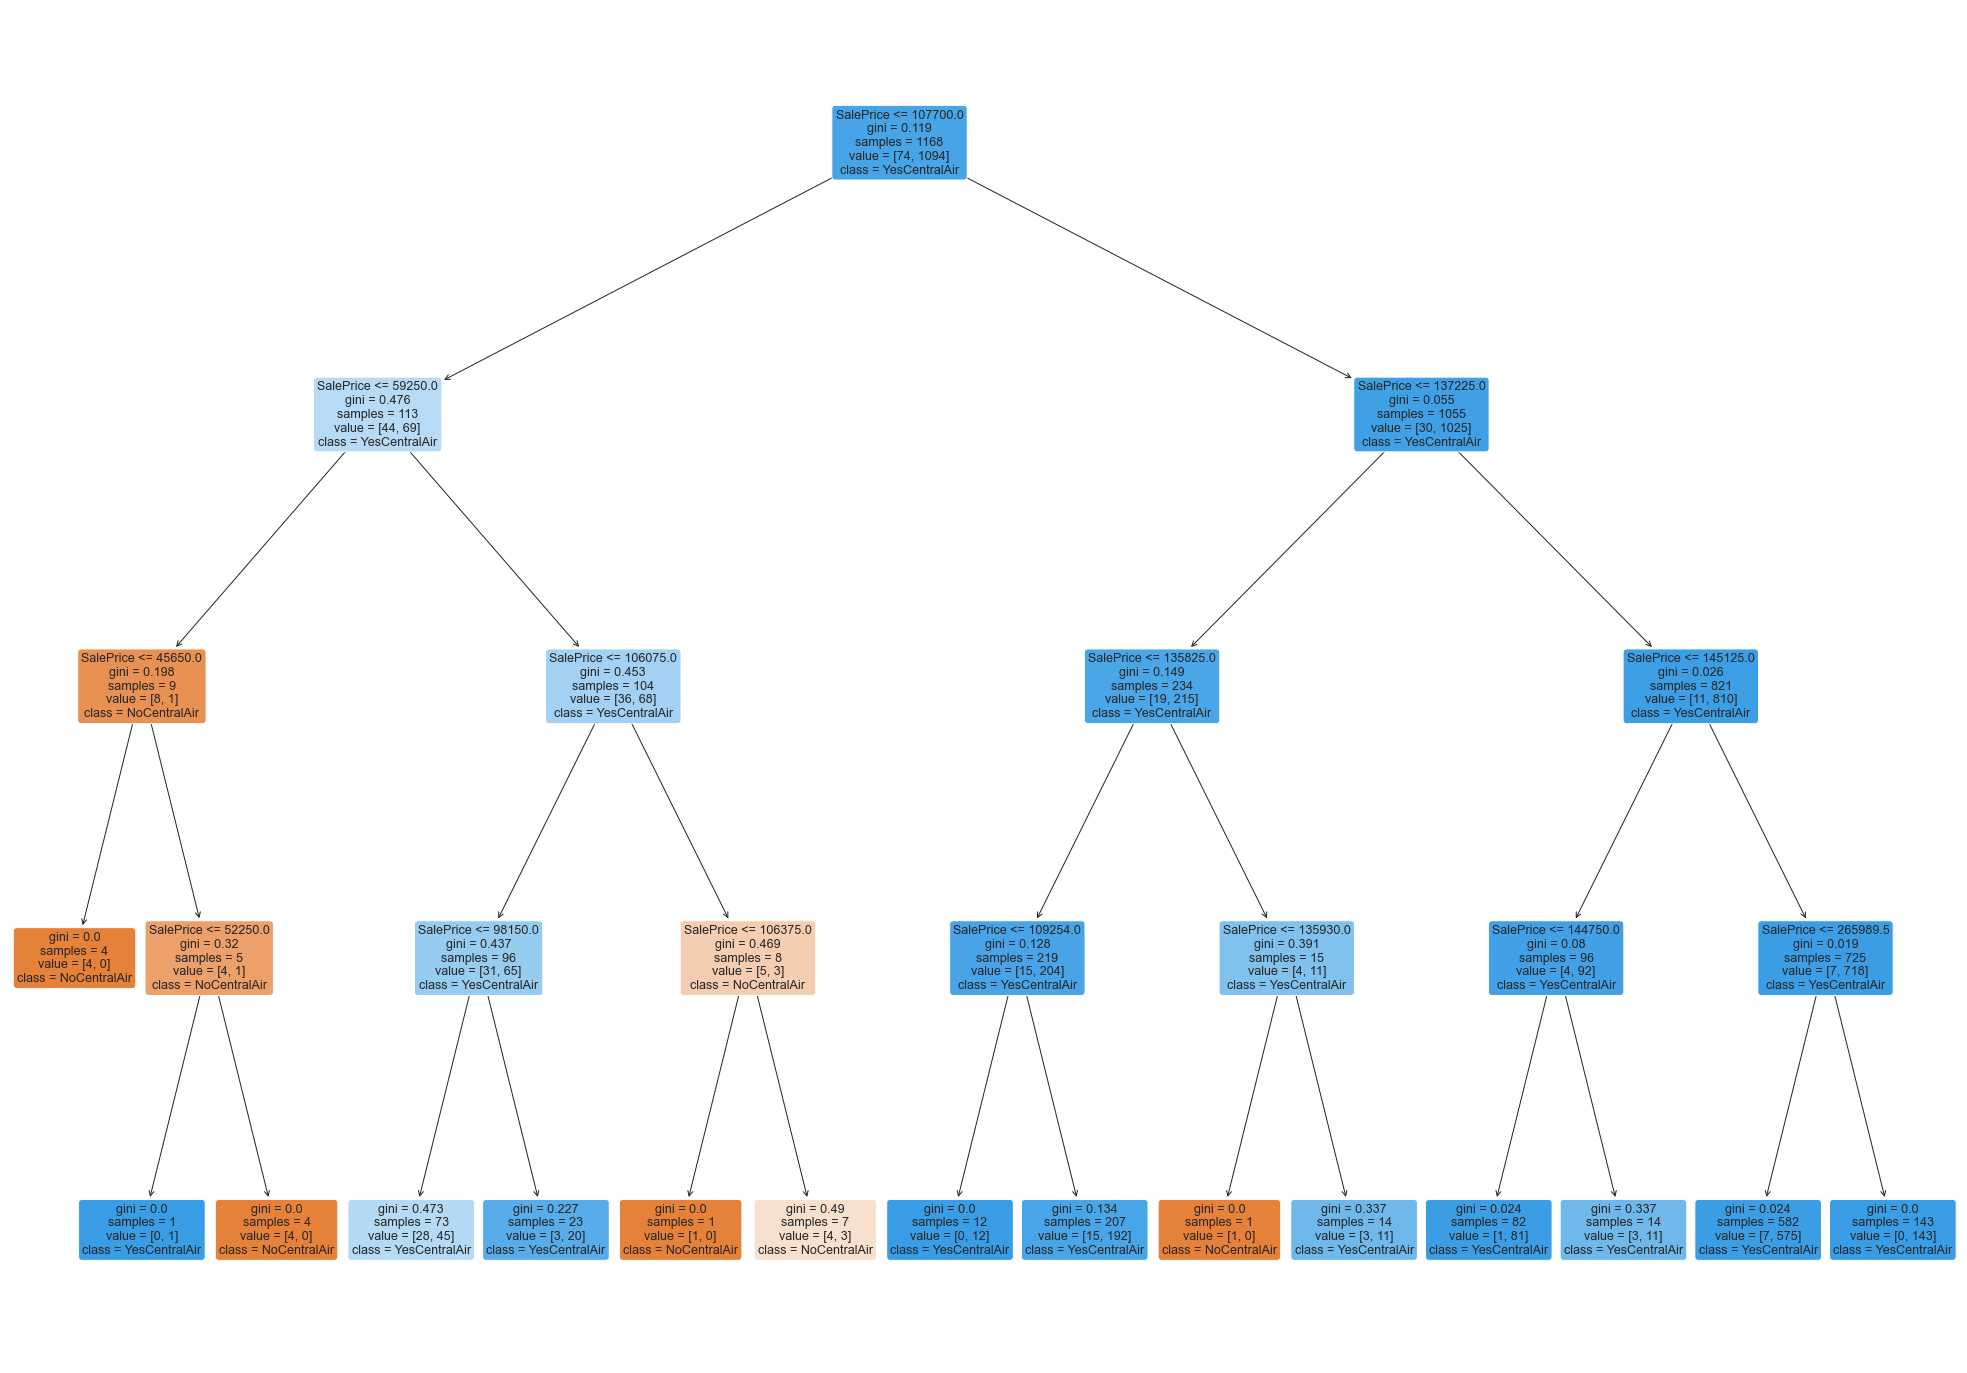

In [11]:
# Decision Tree using Train Data
dectree4 = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree4.fit(SalePrice_train, CentralAir_train)   # train the decision tree model

# Plot the trained Decision Tree of max depth 4
f = plt.figure(figsize=(35,25))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["NoCentralAir","YesCentralAir"])

---
### (a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

>From the Classification Tree above, the node with the highest number of False Positives (FP) is the leaf node with gini index = 0.473, samples = 73, value = [28, 45]. The value 28 represents the amount of FP values in the node and it is the highest value among the rest of the leaf nodes.

In [19]:
# Store the index of samples from the all leaf nodes in a list called samples
import collections

samples = collections.defaultdict(list)
dec_paths = dectree4.decision_path(SalePrice_train) # get the path of the decision tree

for d, dec in enumerate(dec_paths):
    for i in range(dectree4.tree_.node_count):
        if dec.toarray()[0][i] == 1:
            samples[i].append(d) # put the node samples indexes to samples list

        
leafSet = samples[9]; # samples[9] is the required leaf node that contains the highest FPs          
print(leafSet) # the total number of samples in this leaf node is 73

[50, 57, 66, 84, 97, 104, 114, 122, 124, 130, 146, 150, 223, 238, 253, 277, 279, 299, 341, 343, 377, 394, 404, 414, 420, 428, 430, 492, 499, 511, 514, 519, 528, 534, 620, 632, 634, 636, 650, 661, 693, 703, 709, 712, 716, 757, 761, 768, 774, 813, 825, 828, 880, 893, 897, 903, 971, 988, 1015, 1020, 1037, 1050, 1062, 1084, 1098, 1110, 1124, 1126, 1141, 1145, 1158, 1166, 1167]


In [20]:
# Print the rows of the SalePrice_train in the chosen leaf node
SalePrice_train.loc[SalePrice_train.index[leafSet]]

,SalePrice
935,79900
589,79500
821,93000
1086,83500
494,91300
...,...
1001,86000
398,67000
749,98000
235,89500


---
### (b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a).

In [21]:
# These shows the values of CentralAir in the selected leaf node
CentralAir_train.loc[CentralAir_train.index[leafSet]]

,CentralAir
935,Y
589,Y
821,N
1086,Y
494,Y
...,...
1001,Y
398,Y
749,N
235,Y


In [22]:
# Print only False Positives of the leaf node which consist of 28 values
SalePrice_train.loc[SalePrice_train.index[leafSet]][CentralAir_train['CentralAir'] == 'N']

/var/folders/p0/0vs_6g9n3p148k8sk746602h0000gn/T/ipykernel_9851/1434244602.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SalePrice_train.loc[SalePrice_train.index[leafSet]][CentralAir_train['CentralAir'] == 'N']


,SalePrice
821,93000
620,67000
1062,90000
242,79000
1376,91000
329,78000
125,84500
1100,60000
1035,84000
676,87000
